# Drug consumptions and personality relations

# Exploratory Data Analysis

In [21]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from helper import category_converter, encoding

import warnings
warnings.filterwarnings("ignore")

In [2]:
!ls

EDA_drug.ipynb                ecstasy.csv
README.md                     helper.py
Technical_notebook_drug.ipynb lsd.csv
__pycache__                   mushroom.csv
drug_consumption.data


### Import data

In [3]:
drug_data = pd.read_csv('drug_consumption.data', header=-1)

drug_data.columns = ['ID','Age','Gender','Education','Country','Ethnicity','Nscore',
              'Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alcohol',
              'Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack',
              'Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms',
              'Nicotine','Semer','VSA']

In [4]:
drug_data.head(2)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0


### Convert back categorical variables

In [5]:
#the dataframe for analysis: 'data'
data = category_converter(drug_data)

In [8]:
# data.Age.value_counts()

In [9]:
# data.Gender.value_counts()

In [10]:
# data.Education.value_counts()

In [11]:
# data.Country.value_counts()

In [12]:
# data.Ethnicity.value_counts()

In [13]:
data.head(2)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0


In [14]:
# data.info()

## Exploring the dataset

### Explanation of Personality Scores:

* Nscore: Neuroticism

* Escore: Extraversion

* Oscore: Openness 

* Ascore: Agreeableness

* Cscore: Conscientiousness

* Impulsive: Impulsiveness

* SS: Sensation-seeking

In [15]:
data.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [544]:
data.loc[:, ['Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
              'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
              'Nicotine', 'Semer', 'VSA']].describe()

,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885
unique,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,7
top,CL0,CL0,CL0,CL6,CL6,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
freq,976,1305,1000,1385,463,807,1038,1627,1021,1605,1490,1094,1069,1429,982,610,1877,1455


#### Ecstasy

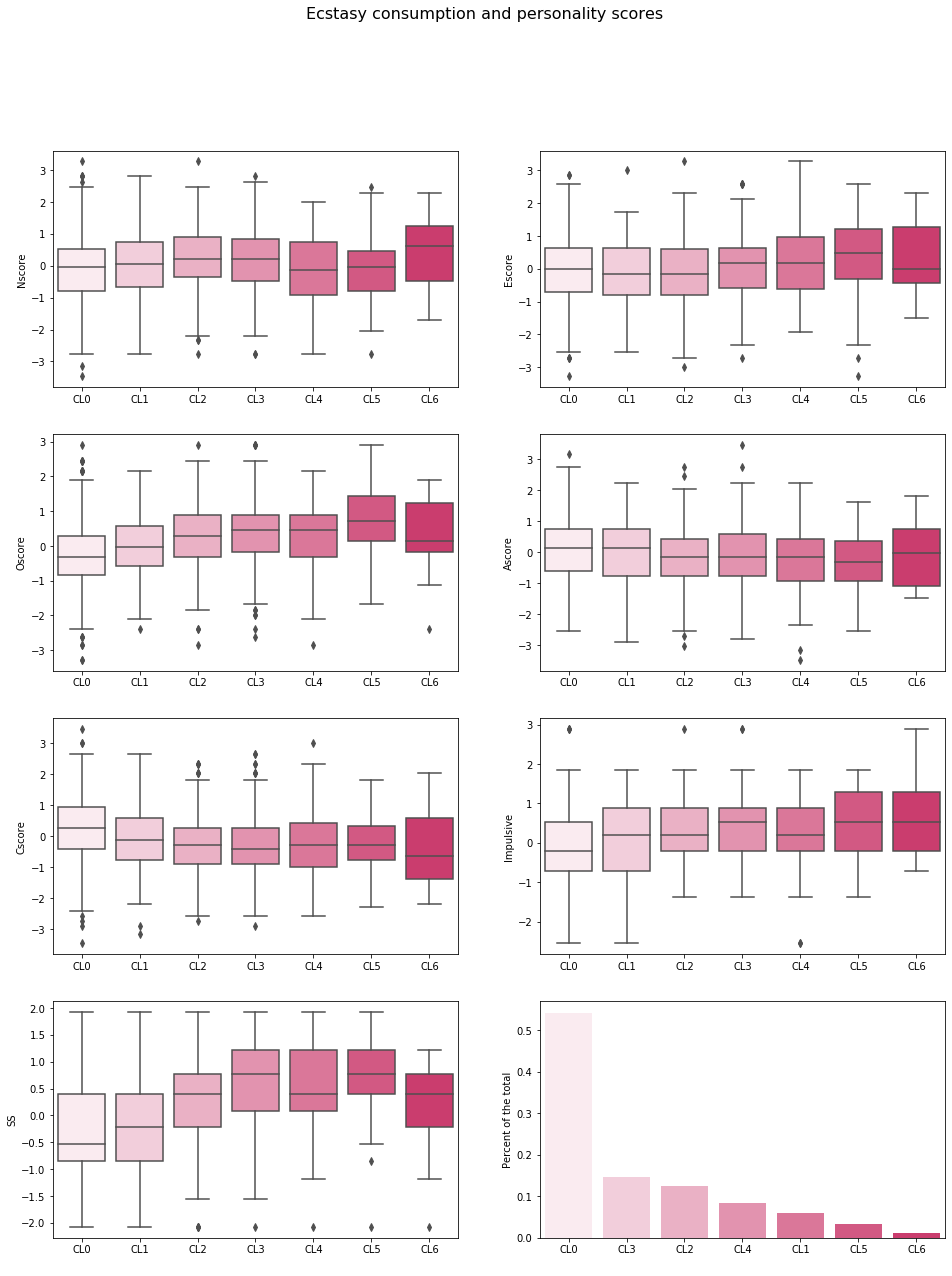

In [508]:
drug = 'Ecstasy'
fig = plt.figure(figsize=(16, 20))
sns.set_palette(sns.light_palette((360, 90, 50), n_colors=7, input="husl"))

plt.suptitle(f'{drug} consumption and personality scores', size=16)
for row, personality in enumerate(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']):
    plt.subplot(4, 2, row+1)
    sns.boxplot(x=drug, y=personality, data=data,
                order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
    plt.xlabel(' ')

vc = data[drug].value_counts()/len(data)
plt.subplot(4, 2, 8)
sns.barplot(x=vc.index, y=vc)
plt.ylabel('Percent of the total')

In [591]:
data_ecs = data.loc[:,['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
                          'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Ecstasy']]

In [592]:
data_ecs.Ecstasy = data_ecs.Ecstasy.apply(lambda x: 0 if x in ['CL0', 'CL1'] else 1)

In [593]:
data_ecs.Ecstasy.value_counts()

0    1134
1     751
Name: Ecstasy, dtype: int64

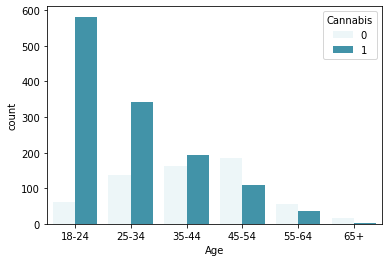

In [ ]:
sns.set_palette(sns.light_palette((220, 90, 60), n_colors=2, input="husl"))

sns.countplot(x="Age", hue="Cannabis", data=data_can, order=['18-24', '25-34','35-44', '45-54', '55-64', '65+'],
             dodge=True)

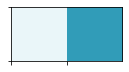

In [629]:
sns.palplot(sns.light_palette((220, 90, 60), n_colors=2, input="husl"))

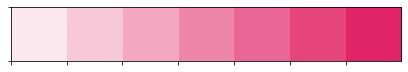

In [507]:
sns.light_palette((210, 90, 60), input="husl")
sns.palplot(sns.light_palette((360, 90, 50), n_colors=7, input="husl"))

#### Amphetamine

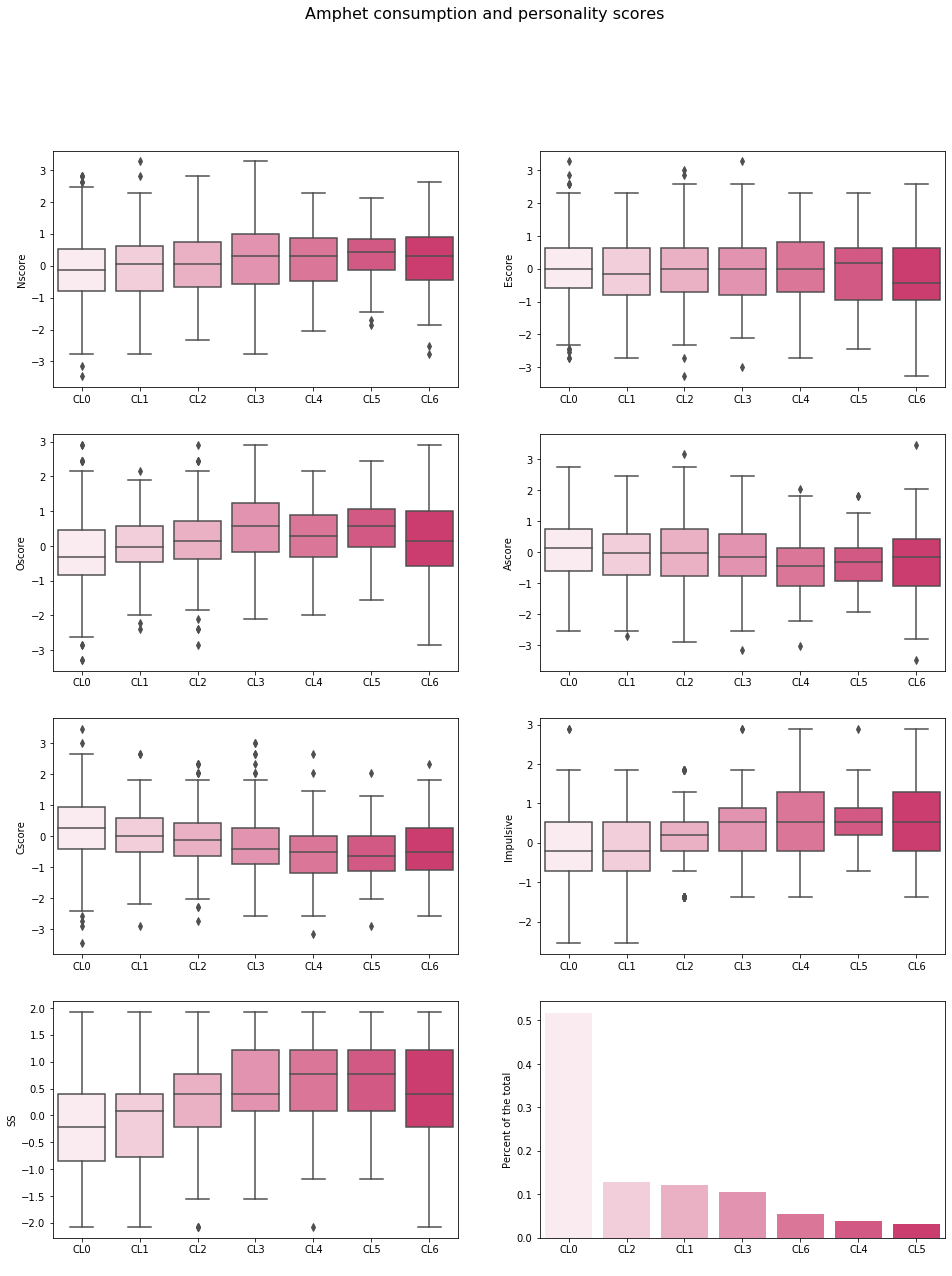

In [509]:
drug = 'Amphet'
fig = plt.figure(figsize=(16, 20))
sns.set_palette(sns.light_palette((360, 90, 50), n_colors=7, input="husl"))

plt.suptitle(f'{drug} consumption and personality scores', size=16)
for row, personality in enumerate(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']):
    plt.subplot(4, 2, row+1)
    sns.boxplot(x=drug, y=personality, data=data,
                order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
    plt.xlabel(' ')

vc = data[drug].value_counts()/len(data)
plt.subplot(4, 2, 8)
sns.barplot(x=vc.index, y=vc)
plt.ylabel('Percent of the total')

#### Cannabis

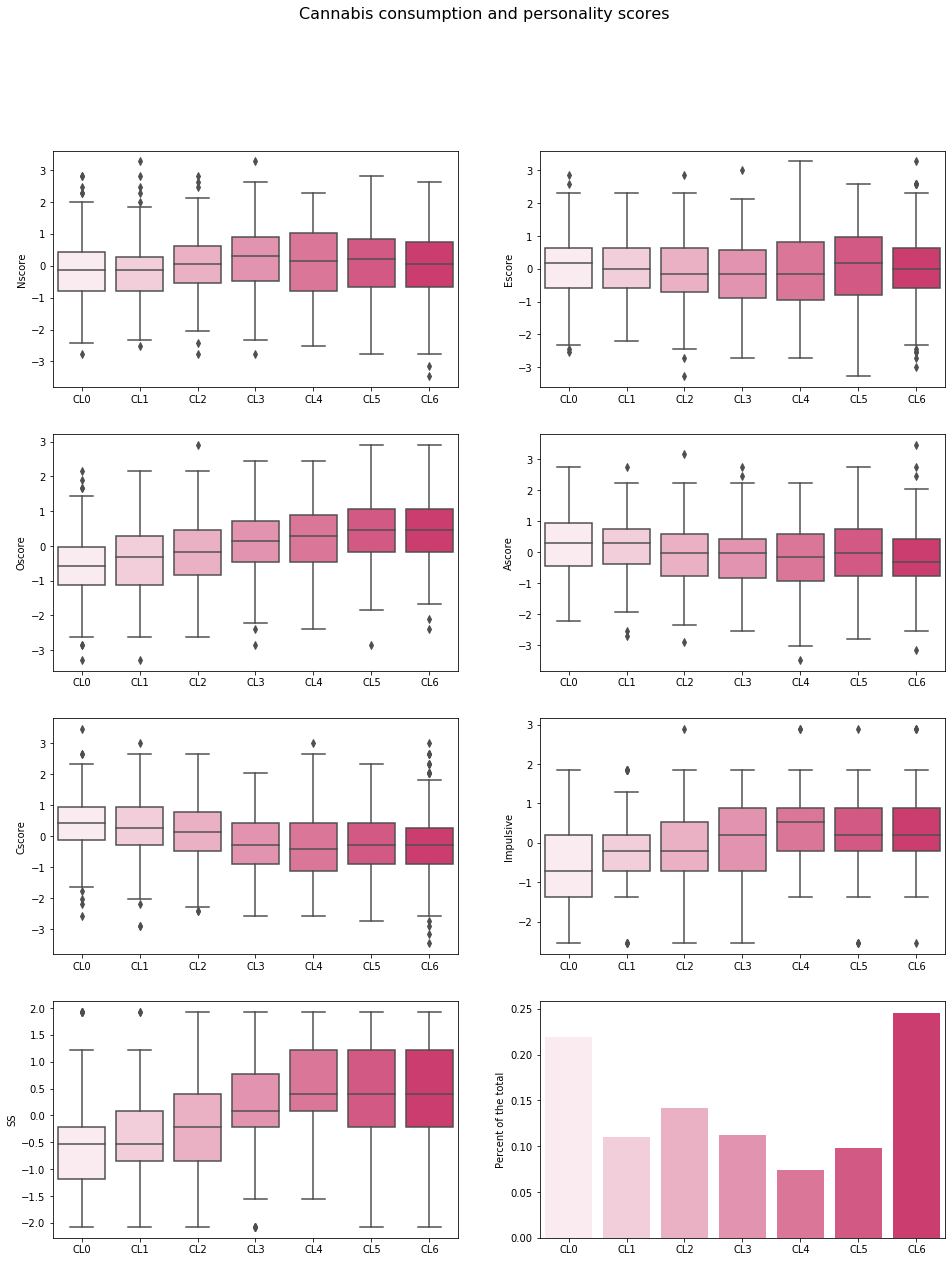

In [520]:
drug = 'Cannabis'
fig = plt.figure(figsize=(16,20))
sns.set_palette(sns.light_palette((360, 90, 50), n_colors=7, input="husl"))

plt.suptitle(f'{drug} consumption and personality scores', size=16)
for row, personality in enumerate(['Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']):
    plt.subplot(4,2,row+1)
    sns.boxplot(x=drug, y=personality, data=data, 
                order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
    plt.xlabel(' ')

vc = data[drug].value_counts()/len(data)
plt.subplot(4,2,8)
sns.barplot(x=vc.index, y=vc, order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
plt.ylabel('Percent of the total');

In [585]:
data_can = data.loc[:,['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
                          'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Cannabis']]

In [587]:
data_can.Cannabis = data_can.Cannabis.apply(lambda x: 0 if x in ['CL0', 'CL1'] else 1)

In [588]:
data_can.Cannabis.value_counts()

1    1265
0     620
Name: Cannabis, dtype: int64

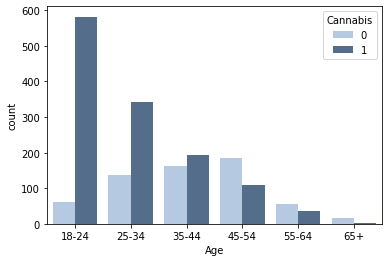

In [589]:
sns.set_palette(['#aec8e8', '#4b6c94'])

sns.countplot(x="Age", hue="Cannabis", data=data_can, order=['18-24', '25-34','35-44', '45-54', '55-64', '65+'],
             dodge=True)

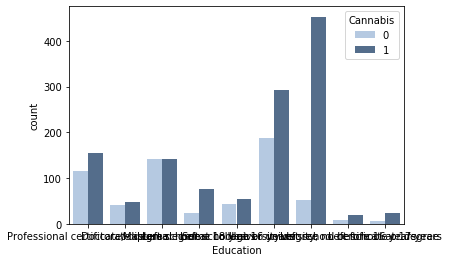

In [590]:
sns.countplot(x="Education", hue="Cannabis", data=data_can, orient='h')

#### Benzodiazepine
https://www.webmd.com/mental-health/addiction/benzodiazepine-abuse#1

''

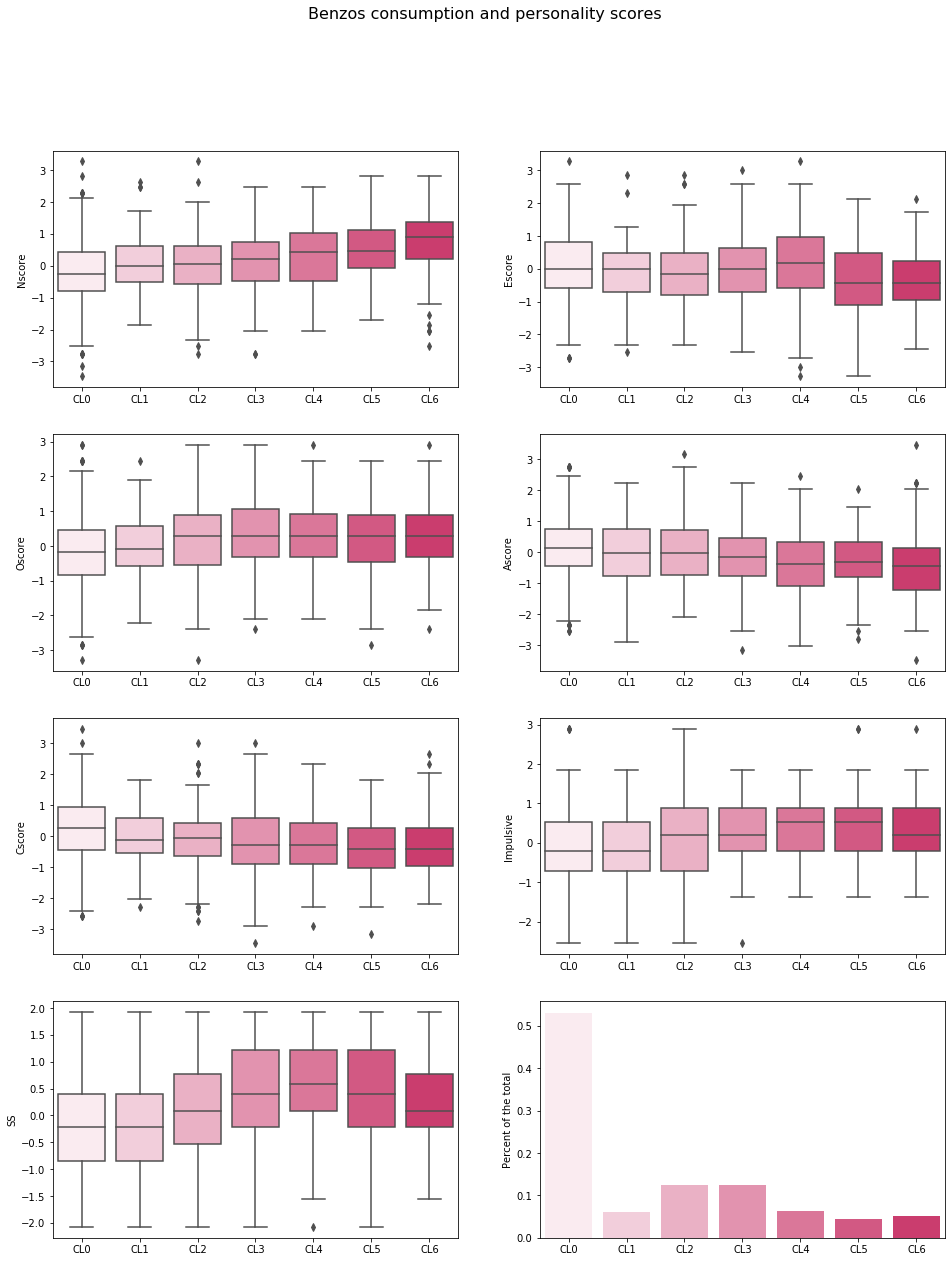

In [521]:
drug = 'Benzos'
fig = plt.figure(figsize=(16,20))
sns.set_palette(sns.light_palette((360, 90, 50), n_colors=7, input="husl"))

plt.suptitle(f'{drug} consumption and personality scores', size=16)
for row, personality in enumerate(['Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']):
    plt.subplot(4,2,row+1)
    sns.boxplot(x=drug, y=personality, data=data, 
                order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
    plt.xlabel(' ')

vc = data[drug].value_counts()/len(data)
plt.subplot(4,2,8)
sns.barplot(x=vc.index, y=vc, order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
plt.ylabel('Percent of the total')
;

In [545]:
data_benzos = data.loc[:,['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
                          'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Benzos']]

In [547]:
data_benzos.Benzos = data_benzos.Benzos.apply(lambda x: 0 if x in ['CL0', 'CL1'] else 1)

In [549]:
data_benzos.Benzos.value_counts()

0    1116
1     769
Name: Benzos, dtype: int64

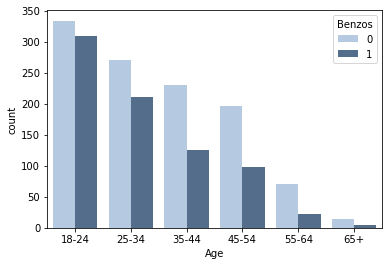

In [581]:
sns.set_palette(['#aec8e8', '#4b6c94'])

sns.countplot(x="Age", hue="Benzos", data=data_benzos, order=['18-24', '25-34','35-44', '45-54', '55-64', '65+'],
             dodge=True)

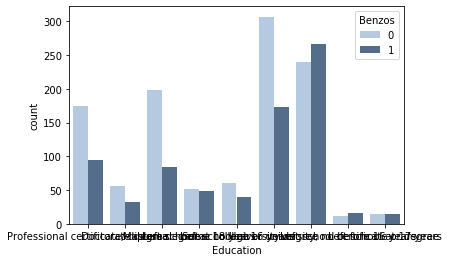

In [582]:
sns.countplot(x="Education", hue="Benzos", data=data_benzos, orient='h')

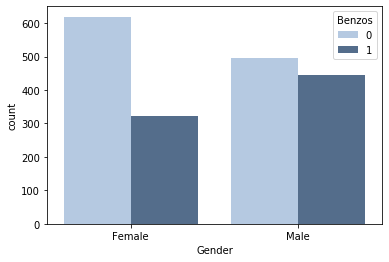

In [583]:
sns.countplot(x="Gender", hue="Benzos", data=data_benzos, orient='h')

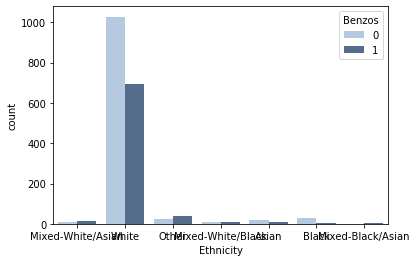

In [584]:
sns.countplot(x="Ethnicity", hue="Benzos", data=data_benzos, orient='h')

#### Mushrooms

''

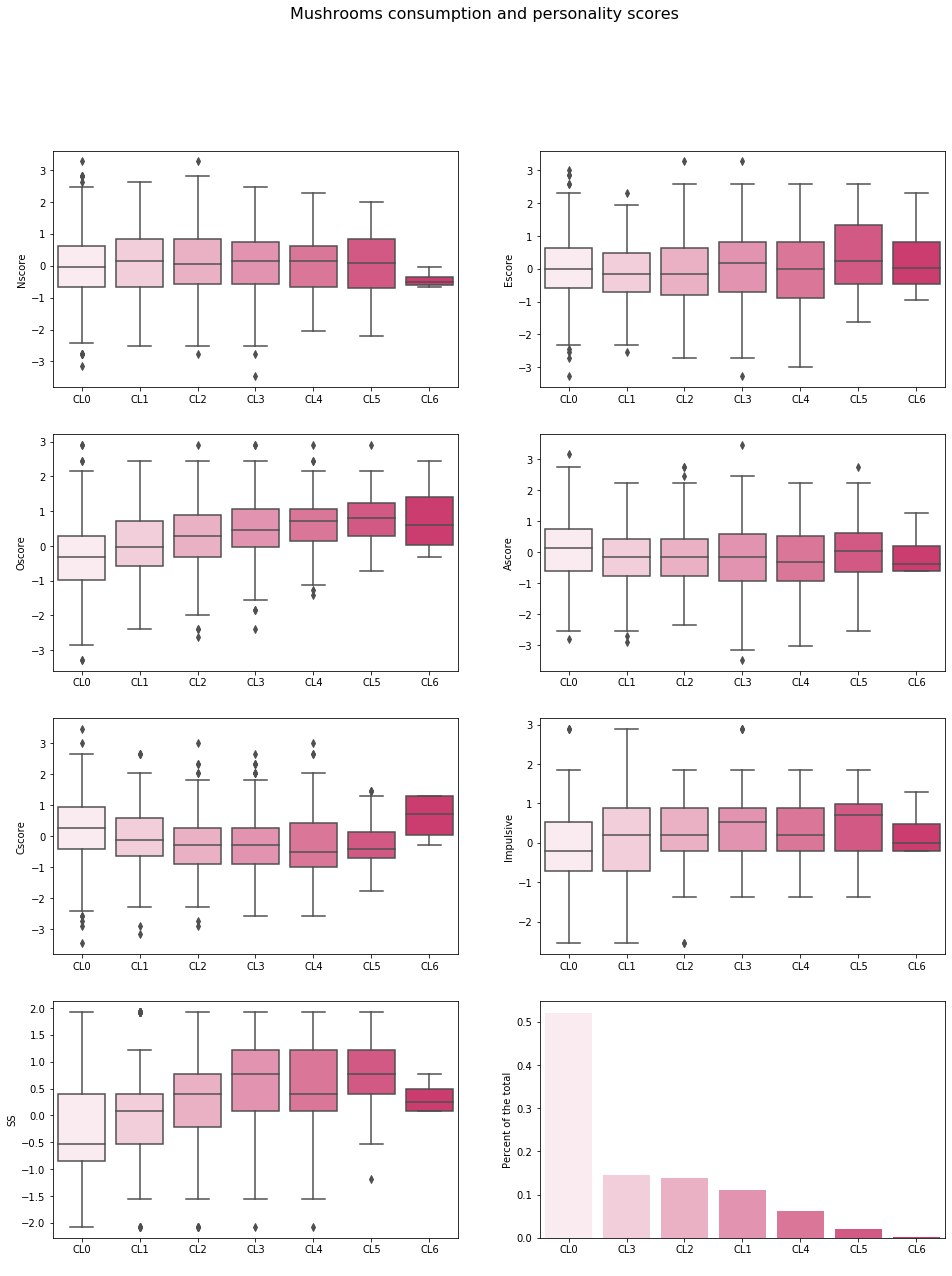

In [513]:
drug = 'Mushrooms'
fig = plt.figure(figsize=(16,20))
sns.set_palette(sns.light_palette((360, 90, 50), n_colors=7, input="husl"))

plt.suptitle(f'{drug} consumption and personality scores', size=16)
for row, personality in enumerate(['Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']):
    plt.subplot(4,2,row+1)
    sns.boxplot(x=drug, y=personality, data=data, 
                order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
    plt.xlabel(' ')

vc = data[drug].value_counts()/len(data)
plt.subplot(4,2,8)
sns.barplot(x=vc.index, y=vc)
plt.ylabel('Percent of the total')
;

#### Nicotine

Text(0, 0.5, 'Percent of the total')

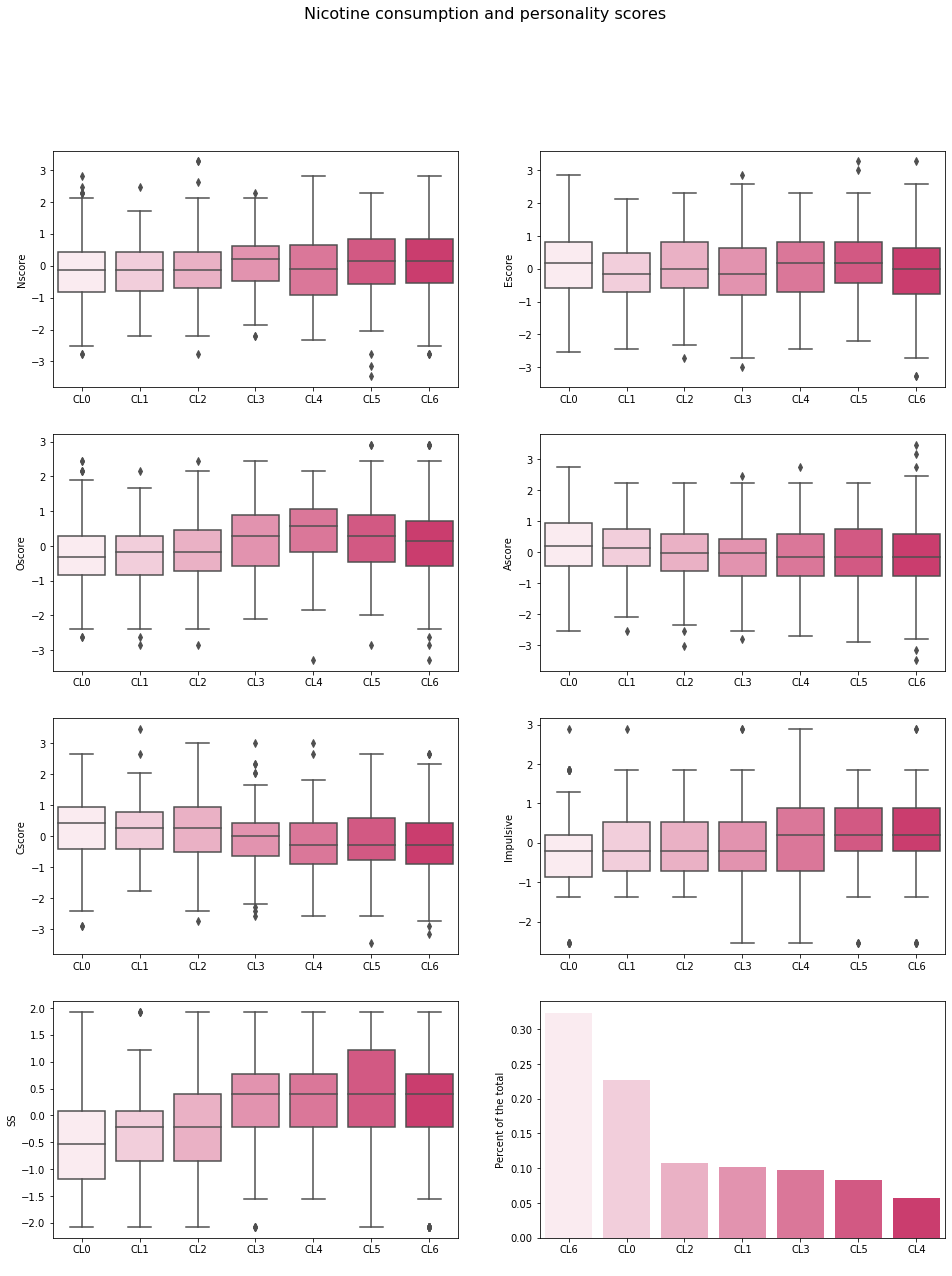

In [514]:
drug = 'Nicotine'
fig = plt.figure(figsize=(16, 20))
sns.set_palette(sns.light_palette((360, 90, 50), n_colors=7, input="husl"))

plt.suptitle(f'{drug} consumption and personality scores', size=16)
for row, personality in enumerate(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']):
    plt.subplot(4, 2, row+1)
    sns.boxplot(x=drug, y=personality, data=data,
                order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
    plt.xlabel(' ')

vc = data[drug].value_counts()/len(data)
plt.subplot(4, 2, 8)
sns.barplot(x=vc.index, y=vc)
plt.ylabel('Percent of the total')

#### Methadone
https://www.webmd.com/mental-health/addiction/what-is-methadone#1

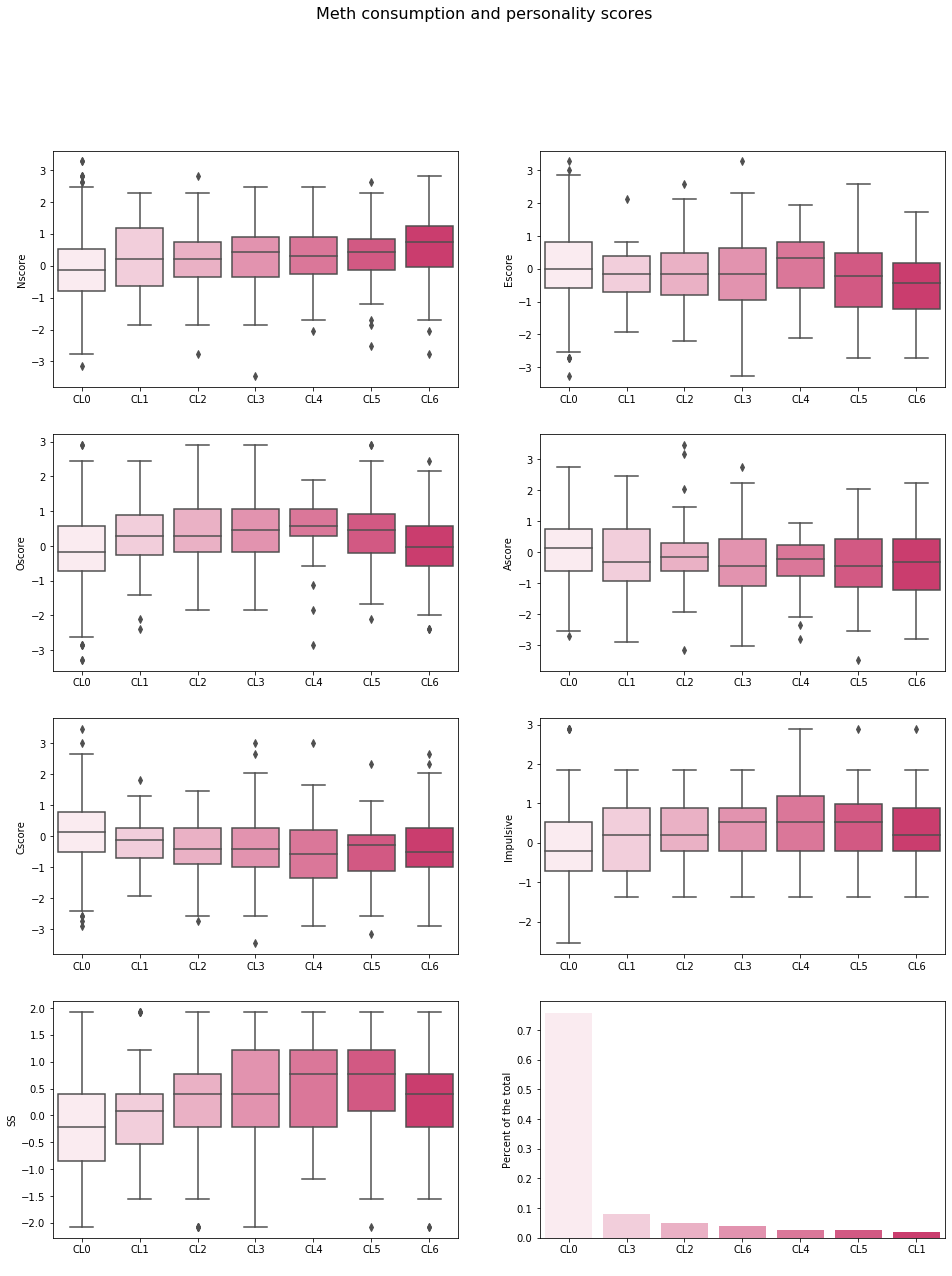

In [515]:
drug = 'Meth'
fig = plt.figure(figsize=(16,20))
sns.set_palette(sns.light_palette((360, 90, 50), n_colors=7, input="husl"))

plt.suptitle(f'{drug} consumption and personality scores', size=16)
for row, personality in enumerate(['Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']):
    plt.subplot(4,2,row+1)
    sns.boxplot(x=drug, y=personality, data=data, 
                order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
    plt.xlabel(' ')

vc = data[drug].value_counts()/len(data)
plt.subplot(4,2,8)
sns.barplot(x=vc.index, y=vc)
plt.ylabel('Percent of the total');

#### LSD

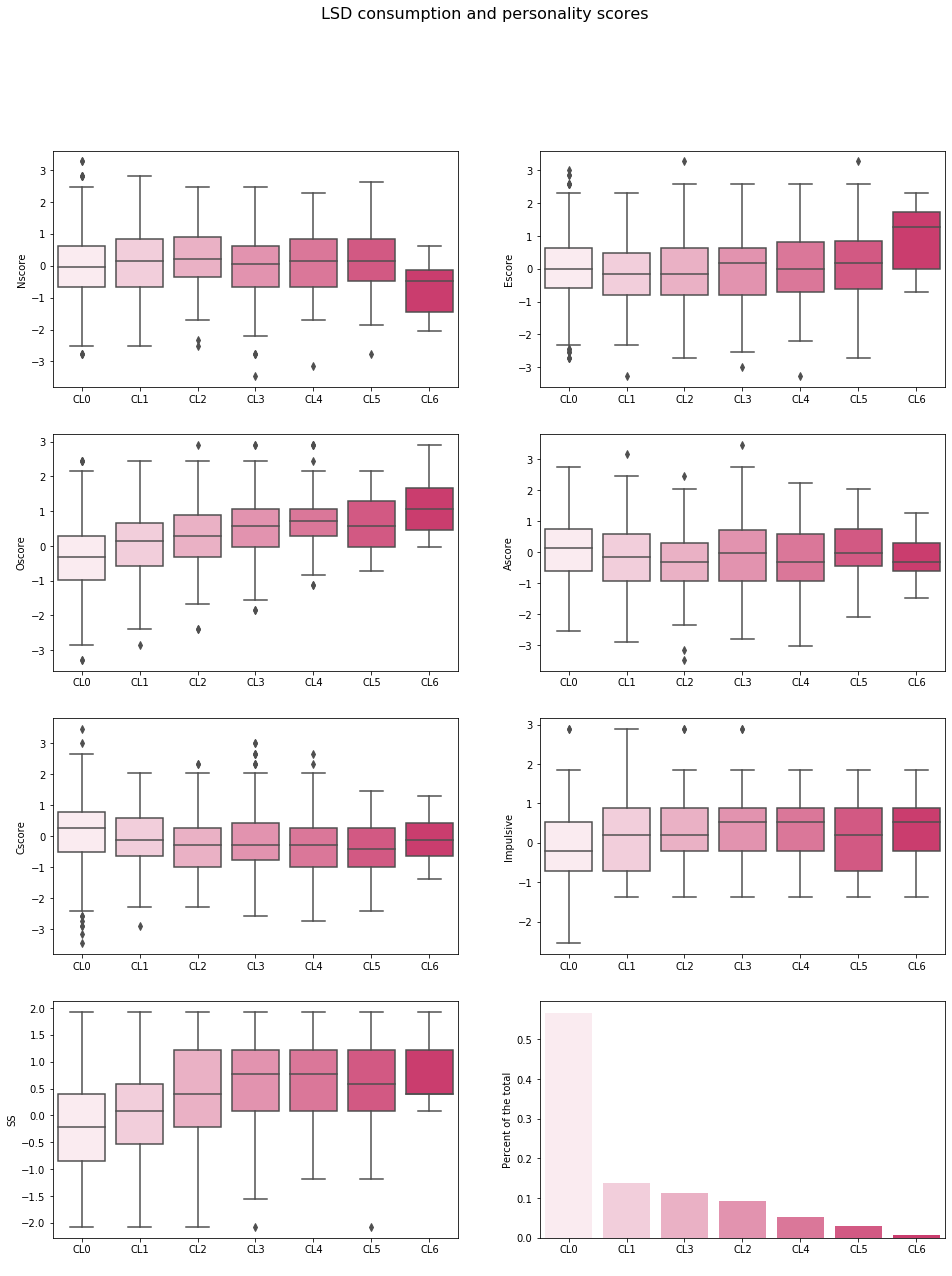

In [517]:
drug = 'LSD'
fig = plt.figure(figsize=(16, 20))
sns.set_palette(sns.light_palette((360, 90, 50), n_colors=7, input="husl"))

plt.suptitle(f'{drug} consumption and personality scores', size=16)
for row, personality in enumerate(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']):
    plt.subplot(4, 2, row+1)
    sns.boxplot(x=drug, y=personality, data=data,
                order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
    plt.xlabel('')

vc = data[drug].value_counts()/len(data)
plt.subplot(4, 2, 8)
sns.barplot(x=vc.index, y=vc)
plt.ylabel('Percent of the total')

## Dataset for modeling

In [16]:
modeling_data = data[['Age', 'Gender', 'Education', 'Nscore', 'Escore', 
                      'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 
                      'Alcohol', 'Amphet','Amyl','Benzos','Caff','Cannabis','Choc',
                      'Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth',
                      'Mushrooms', 'Nicotine','Semer','VSA']]

In [19]:
modeling_data = encoding(modeling_data)

In [19]:
# #encoding age:
# ages = {'18-24': 0,
#         '25-34': 1,
#         '35-44': 2,
#         '45-54': 3,
#         '55-64': 4,
#         '65+': 5}

# modeling_data.Age = data.Age.apply(lambda x: ages[x])

In [20]:
# edu = {'Left school before 16 years': 0,
#         'Left school at 16 years':1,
#         'Left school at 17 years':2,
#         'Left school at 18 years':3,
#         'Some college or university, no certificate or degree':4,
#         'Professional certificate/ diploma':5,
#         'University degree':6,
#         'Masters degree':7,
#         'Doctorate degree':8}

# modeling_data.Education = data.Education.apply(lambda x: edu[x])

In [22]:
# modeling_data.Gender = modeling_data.Gender.apply(lambda x: 1 if x=='Male' else 0)

In [20]:
modeling_data.head()

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,0,5,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,2,1,5,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,0,0,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,2,0,8,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [23]:
drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
         'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
         'Mushrooms', 'Nicotine', 'Semer', 'VSA']

In [24]:
for drug in drugs:
    modeling_data[drug] = modeling_data[drug].apply(lambda x: 0 if x in ['CL0', 'CL1'] else 1)

In [25]:
modeling_data.head(2)

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,0,5,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,...,0,0,0,0,0,0,0,1,0,0
1,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,...,1,0,1,0,1,1,0,1,0,0


### Ecstasy

In [53]:
ecstasy = modeling_data.loc[:, ['Age', 'Gender', 'Education', 'Nscore', 'Escore',
                                'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Ecstasy']]
ecstasy.columns = ['Age', 'Gender', 'Education', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness',
       'Conscientiousness', 'Impulsiveness', 'Sensation-seeking', 'User']

In [54]:
ecstasy.head(2)

,Age,Gender,Education,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation-seeking,User
0,2,0,5,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1


In [55]:
ecstasy.to_csv('ecstasy.csv')

### LSD

In [38]:
lsd = modeling_data.loc[:, ['Age', 'Gender', 'Education', 'Nscore', 'Escore',
                            'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'LSD']]
lsd.rename(columns={'LSD': 'User'}, inplace=True)

In [39]:
lsd.head(3)

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,User
0,2,0,5,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,2,1,5,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0


In [40]:
lsd.to_csv('lsd.csv')

### Mushrooms

In [41]:
mushrooms = modeling_data.loc[:, ['Age', 'Gender', 'Education', 'Nscore', 'Escore',
                                  'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Mushrooms']]
mushrooms.rename(columns={'Mushrooms': 'User'}, inplace=True)

In [42]:
mushrooms.head(3)

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,User
0,2,0,5,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
2,2,1,5,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0


In [43]:
mushrooms.to_csv('mushrooms.csv')

### Nicotine

In [44]:
nicotine = modeling_data.loc[:, ['Age', 'Gender', 'Education', 'Nscore', 'Escore',
                                  'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Nicotine']]
nicotine.rename(columns={'Nicotine': 'User'}, inplace=True)

In [46]:
nicotine.head(2)

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,User
0,2,0,5,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1
1,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1


In [48]:
nicotine.to_csv('nicotine.csv')

### Benzos

In [49]:
benzos = modeling_data.loc[:, ['Age', 'Gender', 'Education', 'Nscore', 'Escore',
                               'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Benzos']]
benzos.rename(columns={'Benzos': 'User'}, inplace=True)

In [50]:
benzos.head(2)

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,User
0,2,0,5,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1
1,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0


In [51]:
benzos.to_csv('benzos.csv')